# CLASIFICACION BINARIA

Predecir la columna quality
* Legit = 0
* Fraud = 1

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('../../CURSO_ANALISIS_BD2/data/varios/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [38]:
df.shape

(6497, 13)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [40]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [41]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

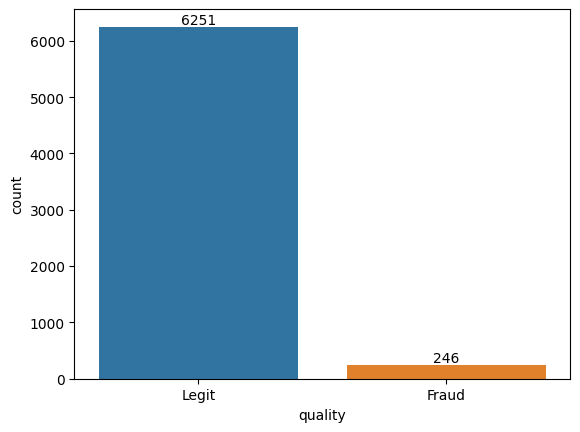

In [42]:
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0]);

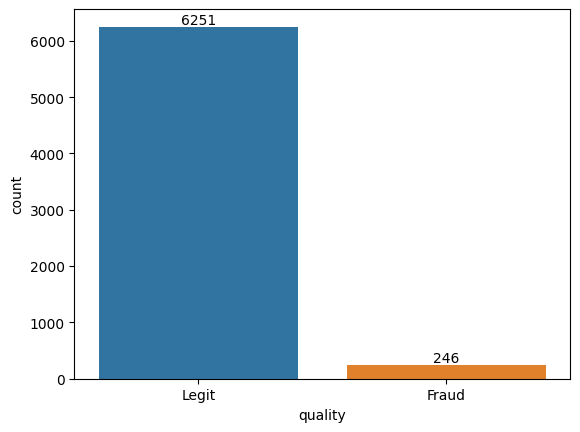

In [43]:
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0]);

In [44]:
df['fraud'] = df['quality'].map({
    'Fraud': 1,
    'Legit': 0
})
df.drop('quality', axis=1, inplace=True)
# NOTA: drop_first permite eliminar la primera columna que se genera para evitar
# correlación entre las propias columnas de entrada
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


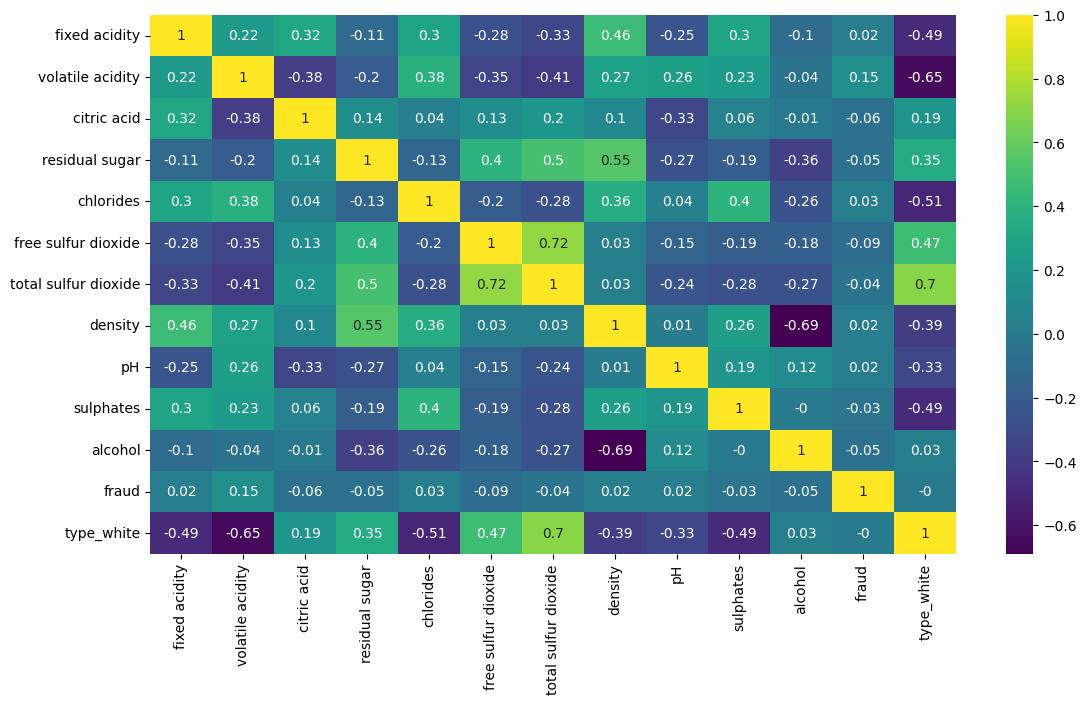

In [45]:
plt.figure(figsize=(13, 7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

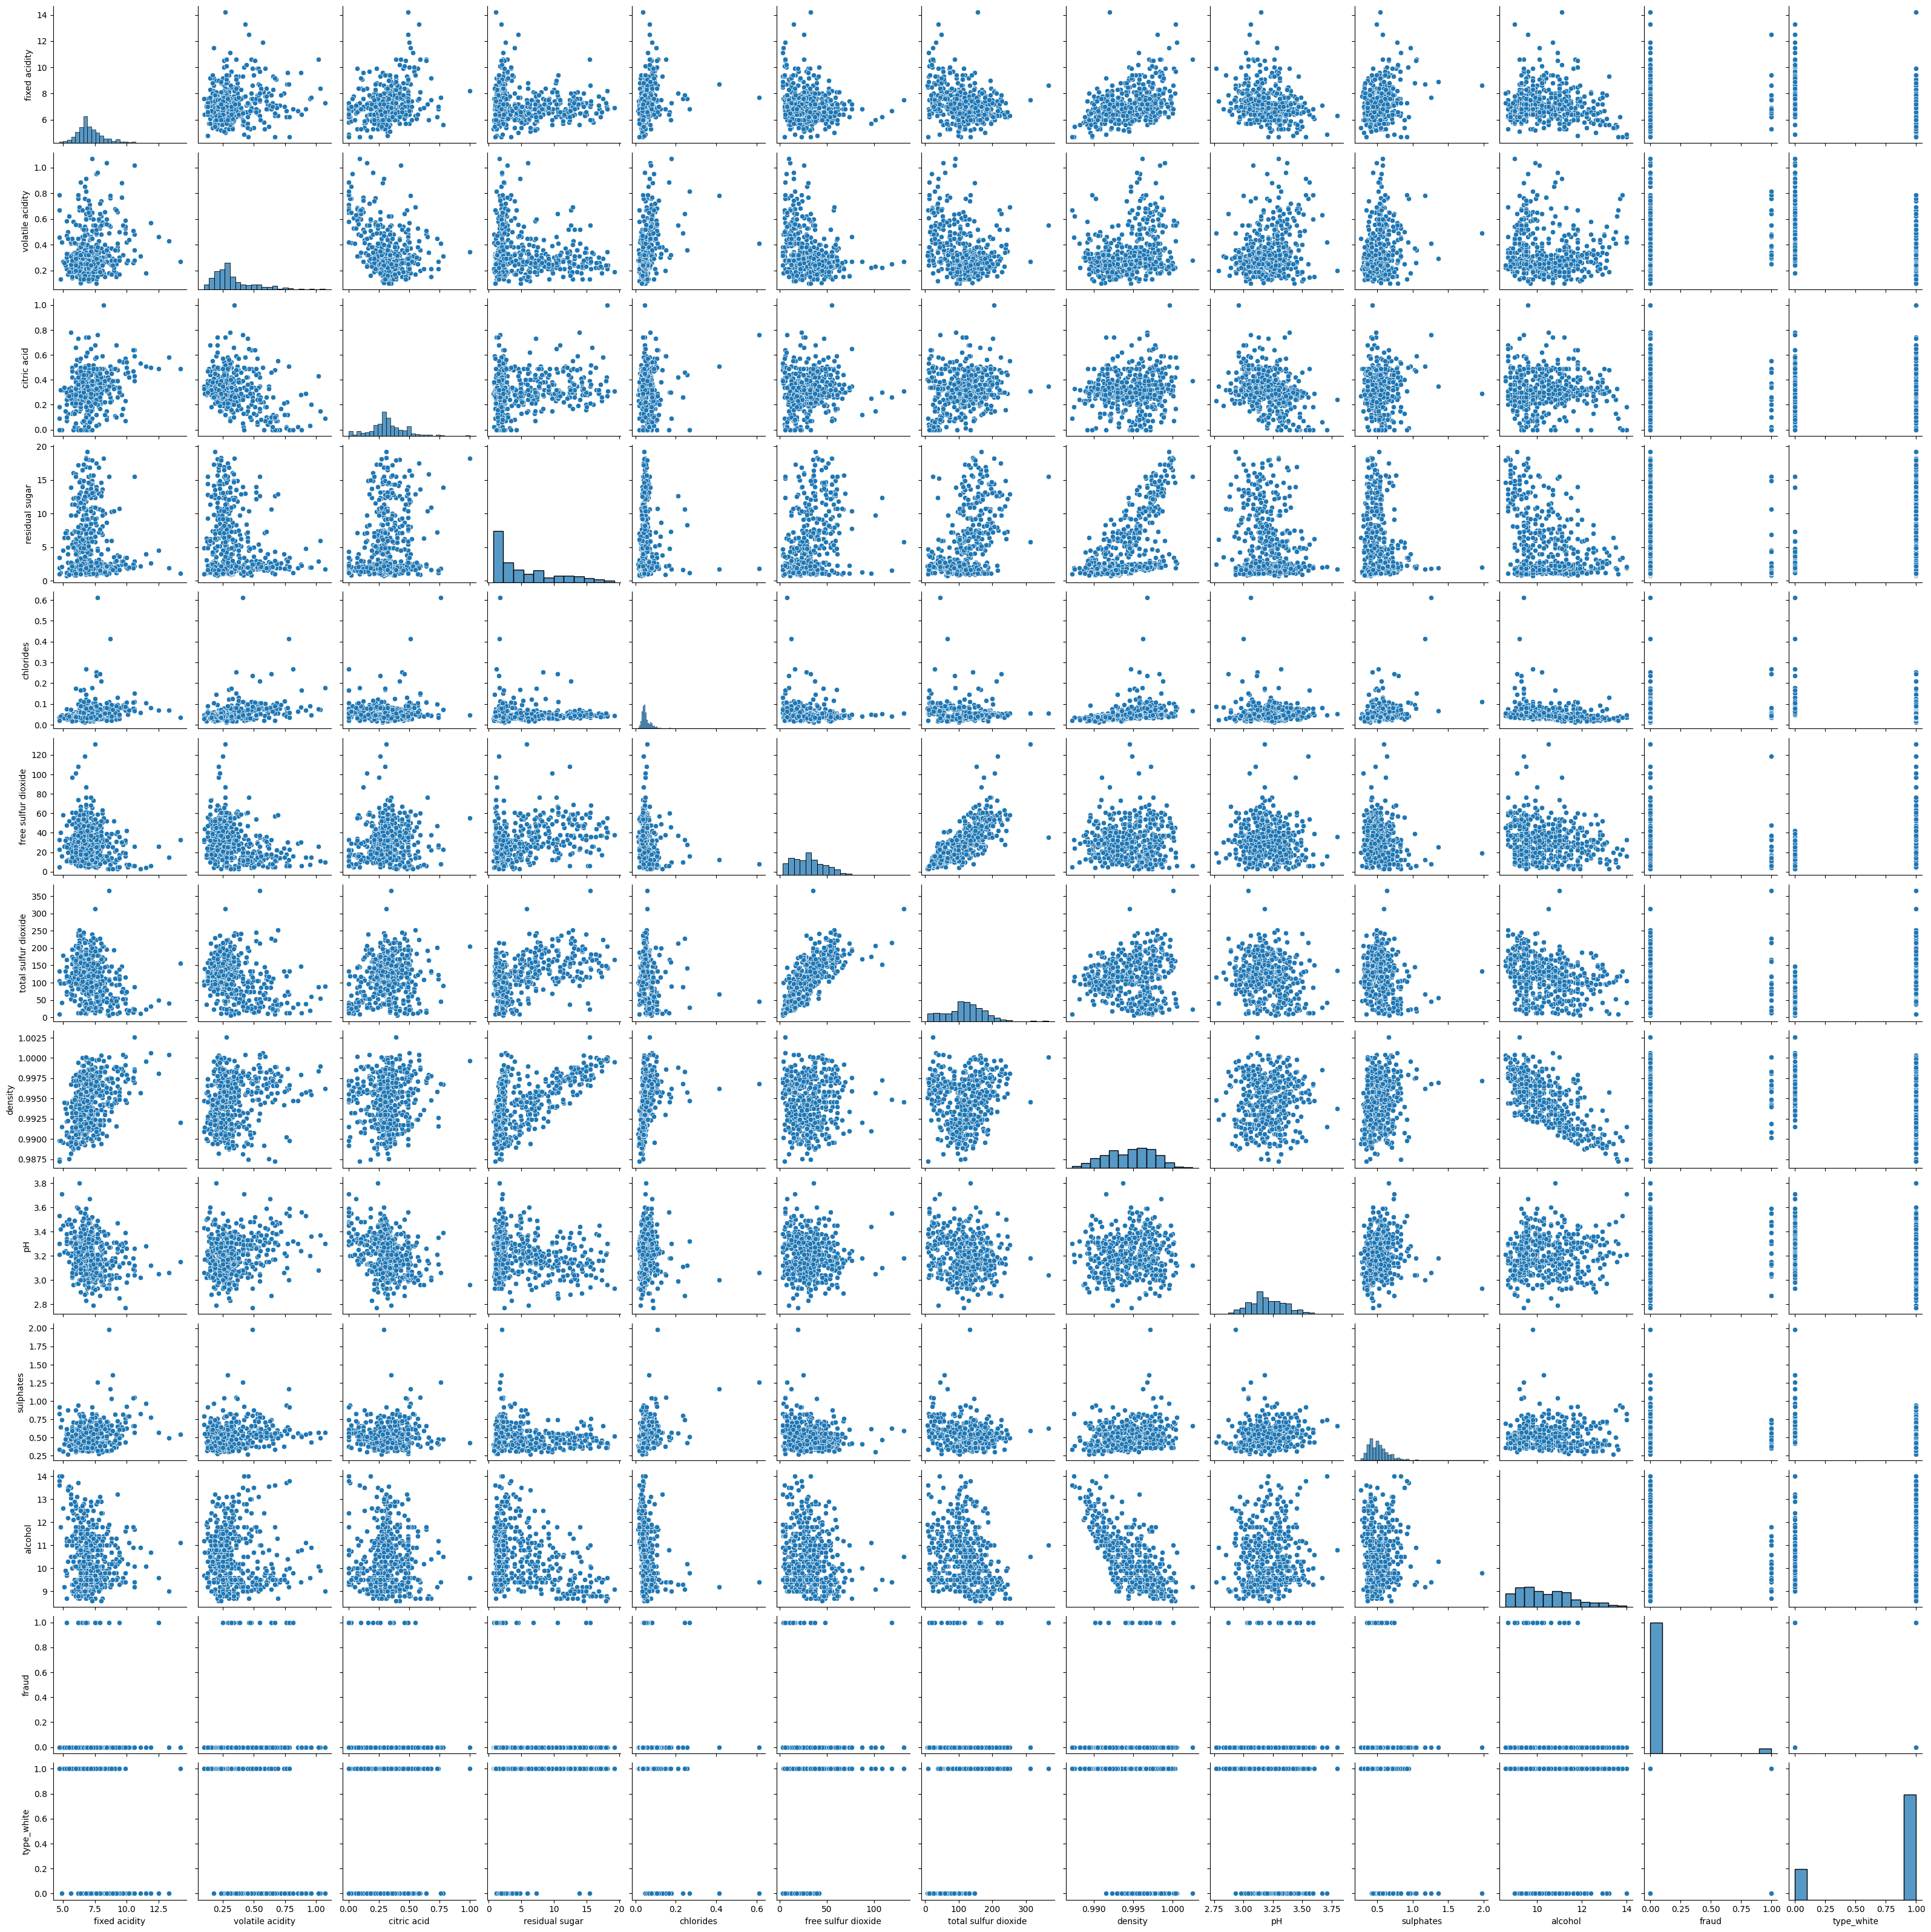

In [46]:
sns.pairplot(df.sample(500))

<Axes: xlabel='volatile acidity', ylabel='free sulfur dioxide'>

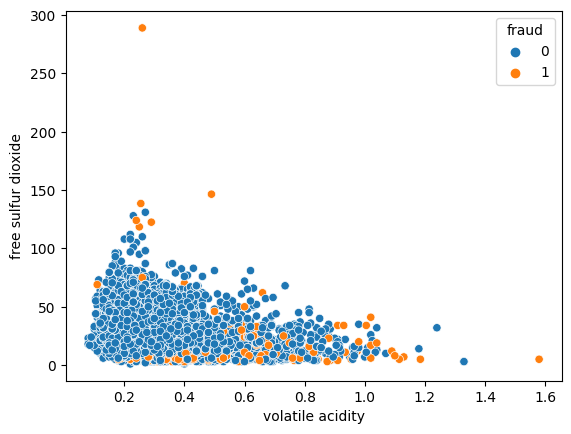

In [47]:
sns.scatterplot(data=df, x='volatile acidity', y='free sulfur dioxide', hue='fraud')

<Axes: xlabel='alcohol', ylabel='fraud'>

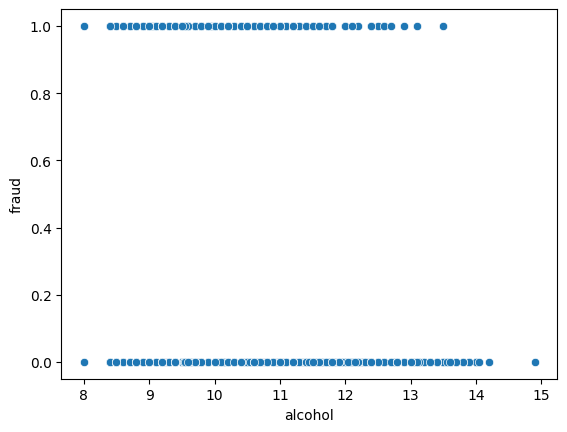

In [48]:
sns.scatterplot(data=df, x='alcohol', y='fraud')

<Axes: xlabel='fraud', ylabel='volatile acidity'>

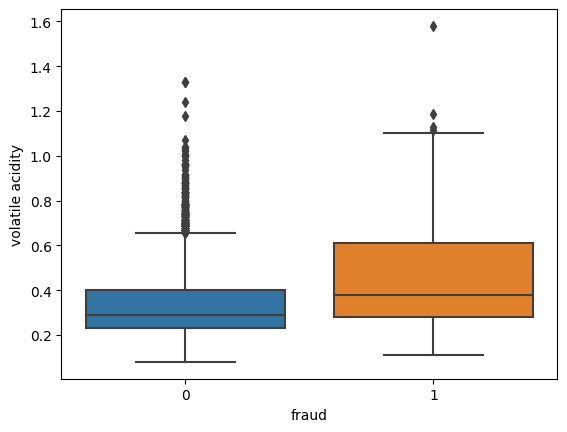

In [49]:
sns.boxplot(data=df, x='fraud', y='volatile acidity')

<Axes: xlabel='fraud', ylabel='alcohol'>

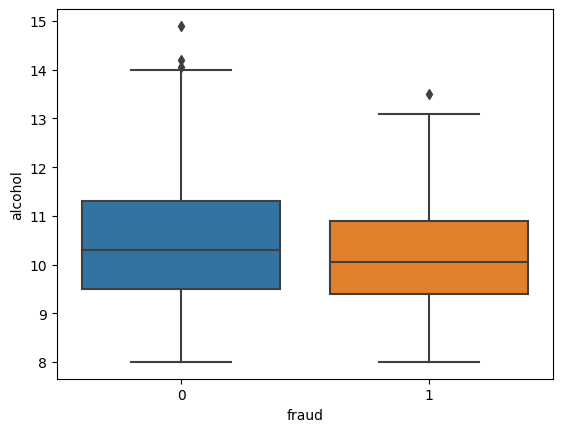

In [50]:
sns.boxplot(data=df, x='fraud', y='alcohol')

(0.0, 150.0)

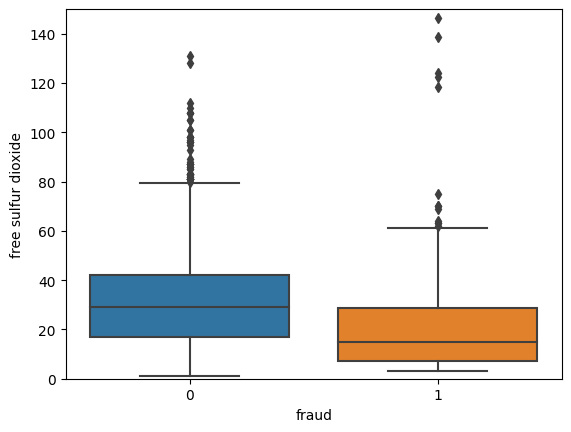

In [51]:
sns.boxplot(data=df, x='fraud', y='free sulfur dioxide')
plt.ylim(0, 150)

# PARTICIONAMIENTO

In [52]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [53]:
X = df.drop('fraud', axis=1)
y = df['fraud']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# REGRESION LOGISTICA

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1251
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1300
   macro avg       0.48      0.50      0.49      1300
weighted avg       0.93      0.96      0.94      1300



c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

# BALANCEAR CLASES

* https: 

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [58]:
print(f'original: {X_train.shape} {y_train.shape}')
print(f'resampled: {X_train_res.shape} {y_train_res.shape}')

original: (5197, 12) (5197,)
resampled: (10000, 12) (10000,)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

